In [1]:
# 머신러닝
# 지도학습 : 선형회귀, 로직스틱 회귀, svm, 뉴럴네트워크
# 비지도 학습 : 유사한 데이터 묶어줌, 군집, 차원축소(데이터 변동), -> 클러스팅에 관련된 분류
# 강화학습 : 실제 모델과 연관성 분석


In [2]:
# 강화학습(supervised learning)
# 무조건 정답이 있음 특정 입력에 대해 특정 출력이 나오게 규칙을 찾는것
# 데이터에 기반을 해서 규칙을 찾아 새로운 데이터에 적용
# 트레이닝 데이터에 라벨(정답지) -> 머신러닝 알고리즘
# new data -> predictive model -> prediction


In [ ]:
# 회귀 평가지표 : RMSE, MAPE, MASE
# 모델이 좋다 나쁘다에 대한 평가지표
# RMSE 가 0이면 실제값과 예측값이 같은것
# 모델을 만들었으면 그 모델이 성능이 제대로 나오는지 확인하는 평가지표 
# 분류는 평가표를 만들수있음.

In [3]:
# 지도학습에 분류의 문제는 라벨이 정해져있음.
# 비지도학습에 분류라고 하는것은 정답지가 없음. => 주관적임


In [4]:
# 데이터프레임,  샘플즈 * 피쳐(어트리뷰트)  

In [5]:
# 상황에 맞게 지도학습 비지도학습 믹스
# 보통 라벨을 오른쪽으로 빼고, 만듬

In [6]:
# 내부적으로 어떻게 모델을 들어갈것인가.
# 데이터프레임을 행렬로 본다면 
# x에 대한 특징 매트릭스 벡터로 표현 
# 문자값은 숫자값으로 변경해야함


In [7]:
# 기본적인 프로세스
# 1. 데이터를 불러온다.
# 2. 특징(피쳐)과 정답지(라벨즈)를 분류한다.
# 3. 트레이닝과 테스트로 데이터셋 분류
# 4. 알고리즘 실행 (성능이 망하면 피쳐를 다시 잡아야함)
# 5. 알고리즘에 대해 모델 정함
# 6. 평가 
# 7. 새로운데이터 예측

In [2]:
# knn - 가장 기본적인 분류 알고리즘
# 분류이기 떄문에 정답지를 갖고있다.
# 빨간색이냐 파란색이냐
# mnist -> 필기체 인식
# 
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

C:\Users\1-13\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\1-13\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
mnist
# dtype = unit8 -> 0 ~ 255 까지 명암 표현

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [85]:
mnist = fetch_mldata("MNIST original")
import matplotlib.pylab as plt
import time
import numpy as np
(train_data, test_data, train_labels,test_labels) = train_test_split(np.array(mnist.data),
                                                                      mnist.target,test_size = 0.5 ,
                                                                      random_state=1234)

print(len(train_data))
print(len(test_data))

35000
35000


C:\Users\1-13\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\1-13\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [86]:
# 0~9 까지 데이터가 다 들어있는지 확인!
print(np.unique(train_labels))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [87]:
# 학습시키려는 데이터의 분포가 균일하게 적당히 분포되었는지 확인
# numpy의 unique 활용 
unique, counts = np.unique(train_labels,return_counts=True)
print(np.asarray((unique,counts)).T)

[[0.000e+00 3.401e+03]
 [1.000e+00 3.960e+03]
 [2.000e+00 3.506e+03]
 [3.000e+00 3.600e+03]
 [4.000e+00 3.438e+03]
 [5.000e+00 3.147e+03]
 [6.000e+00 3.456e+03]
 [7.000e+00 3.589e+03]
 [8.000e+00 3.437e+03]
 [9.000e+00 3.466e+03]]


In [88]:
# 실제 데이터 값을 이미지로 확인해보자!
# http://yann.lecun.com/exdb/mnist/
# 28바이 28의 이미지를 확인, 값을 온도에 따라 표현, heatmap 온도값을 색깔로 표현
# 시각화 부분 http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [89]:
import seaborn as sns

In [90]:
# 이미 앞에서 label은 분리하였으니, 순수 데이터에서 크기 부분을 확인하자!!!
print(train_data[0].shape)
print(np.sqrt(train_data[0].shape[0]))

(784,)
28.0


In [91]:
print(test_data[0].shape)
print(np.sqrt(test_data[0].shape[0]))

(784,)
28.0


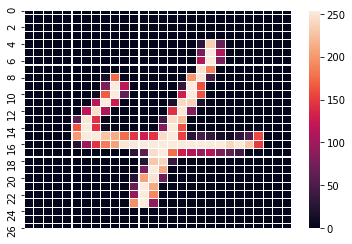

In [92]:
# 보고자 하는 데이터의 index (가로줄)
idx = 0
image_data = train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값을 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data,(one_size,one_size)), linewidth=0.1,xticklabels=False)

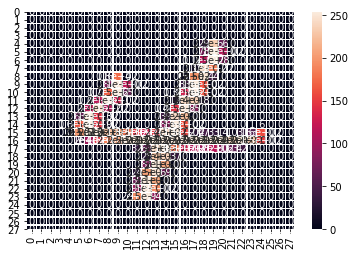

In [93]:
sns.heatmap(np.reshape(image_data,(one_size,one_size)), linewidth=0.1,xticklabels=True,yticklabels=True,annot=True)

In [77]:
# Normalization - Max / Min method
# 사람 키에 대한 컬럼
# 혈압은?? 피검사 했더니 pH 1 ~ 15
# 0.1 -> 1.1 : 10배 변동
# 10000 -> 20000 : 2배 변동
# 변동폭에 대한 부분이 있어야함
# 똑같이 맞춰주고 변동폭만 가지고 영향을 미치는지 안미치는지 확인
# 컬럼에 대한 최소값 최대값만가지고 아니면 0 ~ 1까지의 값
# 각각 피쳐마다 고르게 적당하게 만드는것
# new x = (x - x_min)/(x_max-x_min)

In [94]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
train_norm=min_max_scaler.fit_transform(train_data)
test_norm=min_max_scaler.fit_transform(test_data)

# 값들의 변경
# 주어진데이터에 대해서 체크, 값들의 변경, 주어진 데이터에 맞춰서 변경, train/test data를 변경
# 변동폭체크해서 변경
# 기준에 대해서 테스트에 적용

In [124]:
# 데이터를 까서 시각화,, 전처리
# knn 여러가지 파라미터 있음. 특히 n_jobs : 컴퓨터성능 최대로 병렬 처리할수있도록 해주는 변수(-1하면 최대)

In [100]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
train_data1 = np.concatenate((train_data, train_data), axis=0)
train_labels1 = np.concatenate((train_labels, train_labels), axis=0)

# 분류, 정확도, 과적합피하고자 

In [ ]:
t1 = time.time()
# 모델 세팅
# instantiate learning model(k=3)
# n_jobs= -1 하지 않으면 시간 많이 걸림
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

# 모의고사 문제 정답지 세팅
# fitting the model
knn.fit(train_data1,train_labels1)

# 실전문제 테스트
# predict the response
pred = knn.predict(test_data)

t2 = time.time()
print("Process Time :" + str(t2-t1))

# 실제값과 비교 / 채점
print(accuracy_score(test_labels,pred))

In [127]:
# 통으로 학습하지 않고 나눠서 평가하는것
t1 = time.time()
myList = list(range(1,10))

neighbors = filter(lambda x : x % 2 != 0, myList)

# 각각 평가하기 위해서 만듬
cv_scores = []

# 모델 준비 10등분해서 학습 테스트를 반복 (accuracy의 관점에서 채점)
# 10번의 셋으로 나눴을때 평균값 cv score에 담아놓음
# 에러가 적은 부분에 대해서 봐야됨
# 정확도가 95% 에러가 5% 
# cv_score기준 몇개 맞췄는지 
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    scores = cross_val_score(knn, train_data, train_labels, cv=10,scoring="accuracy")
    cv_scores.append(scores.mean())
    print(scores.mean())







0.9712186538205725
0.9714660951214116
0.9701332546666194
0.9691615104010239
0.9672760819527358


In [127]:
# 에러율 표현   
MSE = [1 - x for x in cv_scores]

# 
optimal k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# 
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()
t2 = time.time()

print("Process Time :" + str(t2-t1))

SyntaxError: invalid syntax (<ipython-input-127-91985ae3798a>, line 5)

NameError: name 'train_data' is not defined

In [128]:
# 통으로 학습하지 않고 나눠서 평가하는것
from sklearn.decomposition import PCA
t1 = time.time()
myList = list(range(1,10))

neighbors = filter(lambda x : x % 2 != 0, myList)

# 각각 평가하기 위해서 만듬
cv_scores = []

# 모델 준비 10등분해서 학습 테스트를 반복 (accuracy의 관점에서 채점)
# 10번의 셋으로 나눴을때 평균값 cv score에 담아놓음
# 에러가 적은 부분에 대해서 봐야됨
# 정확도가 95% 에러가 5% 
# cv_score기준 몇개 맞췄는지 
num_comp = 1
pca = PCA(n_components=num_comp)
pca.fit(train_data)
train_ext = pca.fit_transform(train_data)


for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    scores = cross_val_score(knn, train_ext, train_labels, cv=10,scoring="accuracy")
    cv_scores.append(scores.mean())
    print(scores.mean())







0.24603991339074618
0.26066758270076895
0.26702923201380285
0.2729710035197217
0.27474384309626554


In [129]:
from sklearn.decomposition import PCA

In [130]:
num_comp = 4
pca = PCA(n_components=num_comp)

In [131]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [132]:
# determine amount of variance explained by components
np.sum(pca.explained_variance_ratio_)

0.2841219982273557

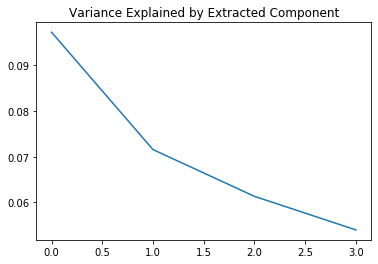

In [133]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Variance Explained by Extracted Component")
plt.show()

In [134]:
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(52500, 4)


In [135]:
test_ext = pca.transform(test_data)
print(test_ext.shape)

(17500, 4)


In [8]:
import numpy as np
train_norm=min_max_scaler.fit_transform(train_ext)
test_norm=min_max_scaler.fit_transform(test_ext)
train_norm1 = np.concatenate((train_norm,train_norm)) 
train_labels1 = np.concatenate((train_labels,train_labels)) 


NameError: name 'min_max_scaler' is not defined

In [5]:
knn = KNeighborsClassifier()
knn.fit(train_norm1,train_labels1)


NameError: name 'KNeighborsClassifier' is not defined

In [138]:
from sklearn.model_selection import cross_val_score

In [3]:
# 784개 가 아니라 40개 대상으로 하는것이기 때문에 더 라이트 하게 돌아감
cross_val_score(knn, train_norm, train_labels, cv=4)

NameError: name 'cross_val_score' is not defined

In [140]:
# 위의 기본세팅에서도 거의 97퍼센트의 결과가 나타났는데 pca로 성분을 줄이면 오히려 더 좋은 성능이나, 적은 데이터로 유사한
# 성능을 확보할수있다.
# 이와 같은 방법을 주로사용하는 이유는 knn은 상당히 심플하면서도 성능이 좋은 알고리즘인데 문제를 차원의 저주에 걸리면 
# 상당한 성능저하를 야기하고 있다. 그래서 기본적으로 많은 사람들이 pca나 dt등 여러가지 방법을 사용하여서 차원축소를 하여
# 적용하는 경우가 많음.

In [4]:
pred = knn.predict(test_norm)
accuracy_score(test_labels,pred)

NameError: name 'knn' is not defined

In [1]:
pred2 = knn.predict(test_norm)
accuracy_score(test_labels,pred2)

NameError: name 'knn' is not defined

In [61]:
pred2 = knn.predict(test_norm)

In [ ]:
pred10 = knn.predict(test_norm)

In [57]:
accuracy_score(test_labels,pred10)

0.9713142857142857

In [62]:
accuracy_score(test_labels,pred2)

0.9713142857142857

In [5]:
# 데이터 특성에따라서 머신러닝 방법 선택 ex) 영상의 경우 딥러닝이 필수
# 머신러닝에서 가장 중요한것은 피쳐를 어떻게 잡는지가 중요
# 딥러닝하기 위해서 가장 기본적인것 : 데이터가 많아야함
# 딥러닝 : 비선형함수에 최적화 -> 사람이 이해하기 힘듬(해석불가)
# 일반적으로 퍼블리싱 많이 되고 찍어내는것 -> 중국에서 많이 함
# 피처(변수)는 x 관측치(샘플)는 n 
# 딥러닝 사용하는 이유 데이터가 많을수록 성능향상
# 상업적인 측면 data 만들어서 파는애들이 돈많이 범
# 주어진데이터에서 각기 계쑤가 어떻게 될지 파라미터를 찾는것이핵심
# 해당모델 만들었으면 실제값과 오차를 제일 작게 해야함
# 손실함수 : e = y-f(x)

In [6]:
# 항상 피팅하는것이 선만 있는 것이아니라 다양하게 있을수있음
# 다중선형 회귀모델(lse/최소자승법), 로지스틱 회귀분석(conjugate), 인공신경망(백 프로파게이션 알고리즘)
# 분류모델 평가 (confusion matrix)
# 그값이 어떠한 카데고리냐 얼마냐?
# 최적의 파라미터 찾기
# 크게 대상이 두개가 있을것임. 맞고 틀림, 파시티브, 네가티브
# 나의 오엠알, 정답지
# 맞은것 TRUE 틀린것 FALSE 이진분류 
# 맞긴했는데 어떻게 맞았는지 구별 (True - Positive / True - Negative)
# False - Positive, False - Negative => 틀린것
# 정확도 4가지 영역에 대해서 맞춘 값이 얼마만큼 차지하고 있는지
# 정확도가 만능이 아닌경우?
# 스팸분류(T-P/F-P) => precision 스팸을 얼마나 잘 분류할것인지 -> (T-P.F-P를 높여야함) 트루에 대한 신뢰도가 높아야됨 정밀도
# 암진단(T-P/F-N) => 암인데 암아니라고 하면 안됨(T-P,F-N을 높여야함) -> Recall (실제데이터중에 얼마나 잘 골라내느냐) 재현율 
# 무엇을 중시하는냐에 따라서 다양한 측면을 고려해야한다. 
# f1 스코어 : 정밀도와 재현율의 평균

# 내가 파지티브라고 했을때 진짜 파지티브가 맞을 확률 {프리시젼}
# 실제 파지티브인것들을 내가 얼마나 잘 찾아낼것인지(리콜)
# 두마리토끼 다잡는 : f1 score

In [7]:
# ROC(수신자 조작 특성)
# AUC(곡선하면적) 면적이 넓은 것이 좋은 성능/모델


In [8]:
# BIased(실제값과 예측값이 얼마나 차이가 나는지) Variance(예측값들의 편차)
# 두가지 파트 실제갖ㅄ과 예측값이 얼마나 차이가 나는지
# 적당한 애들을 찾는것이 가장중요함
# 언더퍼팅(변수가 너무 적음) / 오버피팅 (변수가 너무 많음)
# 편향, 분산이 적당한 부분이 전체에러가 가장 적다.

In [9]:
# 데이터쪼개기
# 데이터셋을 트레이닝과 테스트로 나누는게 가장 일반적이긴함
# 트레이닝과 테스트 사이에 밸리데이션을 두기도함(중간점검)
# 대략 5:3:2 비율로
# 트레이닝 데이터 한번, 테스트 한번, 

In [ ]:
# K-fold cross validation 
# 오버피팅 해결 모형을 객관적으로 평가 
# 시간이 오래걸림
# 그렇게 나누게 되는데 문제는 모의고사 실전 모의고사 실전
# O 가 90개 X 가 10개 
# 모의고사에 x 가 하나도 없으면 -> set별로 비율들이 너무 치우칠수있음.
# 데이터가 불균형한 경우
# 나눠줄때 비율을 유지해서 나눠준다. (Stratified K-fold cross validation)
# 차원축소(비지도 학습계열 pca)  : 차원이 늘어날수록 데이터가 많이 필요해짐
# 몇개를 관찰했는지 개수를 확인
# 차원이늘어날수록 성능이 떨어짐
# K Nearest Neighbor